Region 0: jwst_cutout.shape = (577, 577), valid pixels = 332929
Region 1: jwst_cutout.shape = (354, 353), valid pixels = 124962
Region 2: jwst_cutout.shape = (354, 353), valid pixels = 123585
Region 3: jwst_cutout.shape = (321, 321), valid pixels = 103041
Region 2: jwst_cutout.shape = (354, 353), valid pixels = 123585
Region 3: jwst_cutout.shape = (321, 321), valid pixels = 103041
Region 4: jwst_cutout.shape = (321, 321), valid pixels = 103041
Region 5: jwst_cutout.shape = (481, 481), valid pixels = 231361
Region 4: jwst_cutout.shape = (321, 321), valid pixels = 103041
Region 5: jwst_cutout.shape = (481, 481), valid pixels = 231361
Region 6: jwst_cutout.shape = (322, 321), valid pixels = 103362
Region 7: jwst_cutout.shape = (450, 449), valid pixels = 202050
Region 6: jwst_cutout.shape = (322, 321), valid pixels = 103362
Region 7: jwst_cutout.shape = (450, 449), valid pixels = 202050
Region 8: jwst_cutout.shape = (289, 289), valid pixels = 83521
Region 9: jwst_cutout.shape = (225, 225),

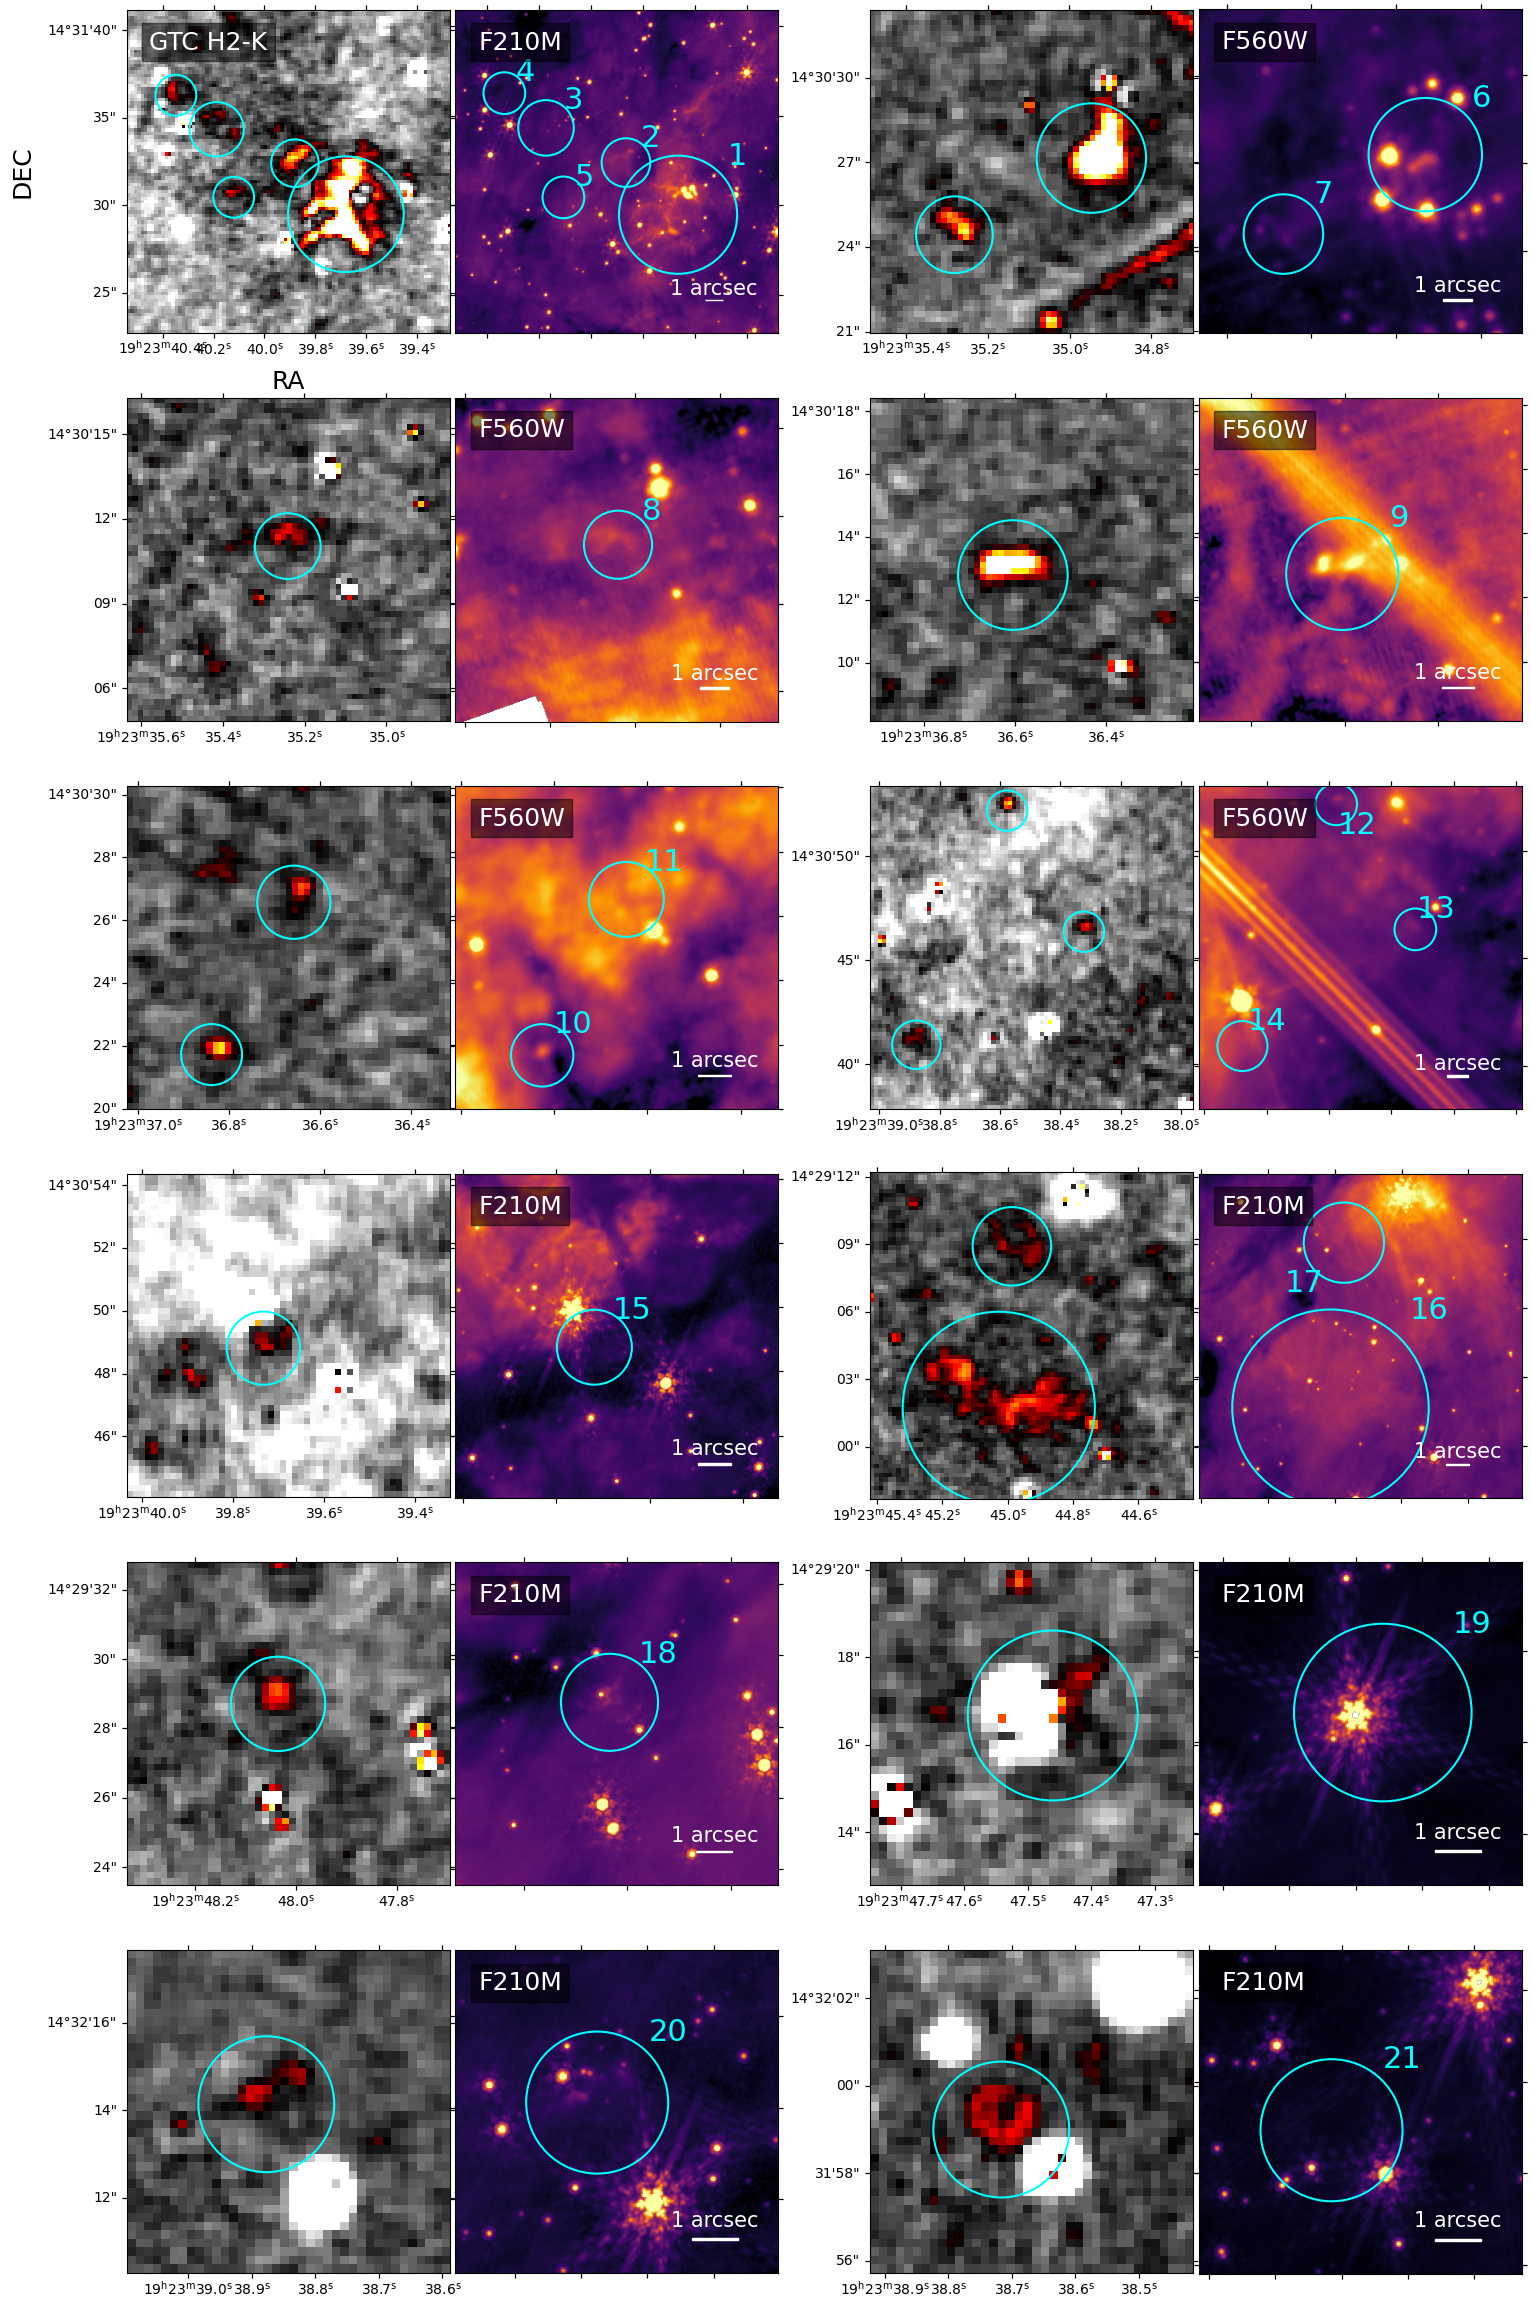

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.nddata import Cutout2D
from astropy.visualization import simple_norm
import matplotlib.colors as mcolors
from matplotlib import gridspec
from astropy.io import fits
from astropy.wcs import WCS
from regions import Regions
import astropy.units as u
from astropy.coordinates import SkyCoord
from regions import PixCoord
import matplotlib.patches as patches
from matplotlib.patches import Rectangle

# small helper to draw a scalebar in pixel coordinates on an Axes
def add_scalebar(ax, xpos, ypos, length, pixel_scale, label=None, color='white', fontsize=20, bbox=False, pad=0.05, thickness=0.05, distance=5.4*u.kpc):
    # length: an astropy Quantity like 1*u.arcsec
    # pixel_scale: angular size per pixel as a Quantity (e.g., 0.031*u.arcsec)
    # compute length in pixels
    try:
        pix_len = (length / pixel_scale).decompose().value
    except Exception:
        # fallback if pixel_scale is a plain number
        pix_len = (length / pixel_scale)
    # draw a white rectangle as scalebar
    rect = Rectangle((xpos - pix_len/2.0, ypos), pix_len, pix_len * thickness, color=color)
    ax.add_patch(rect)
    if label:
        if bbox:
            ax.text(xpos, ypos + pad, label, color=color, fontsize=fontsize, ha='center', bbox=dict(facecolor='black', alpha=0.5, edgecolor='none'))
        else:
            ax.text(xpos, ypos + pad, label, color=color, fontsize=fontsize, ha='center')

# Change layout to 6 rows x 2 object columns with a center gap
# Each object occupies two adjacent GridSpec columns; middle column is a small gap
fig = plt.figure(figsize=(18, 30))
# 6 object rows, 5 total subplot columns (middle column used as gap)
gs = gridspec.GridSpec(6, 5, figure=fig, hspace=0.05, wspace=0.02, width_ratios=[1,1,0.25,1,1])

regions_name_figure12 = '/orange/adamginsburg/w51/TaehwaYoo/jwst_gtc_h2k_new.reg'
regions_name_mark = '/orange/adamginsburg/w51/gtc/adendawson/real_reduction/photometry_notebooks/regions/Figure12_regions.crtf'

regions_figure12 = Regions.read(regions_name_figure12, format='ds9')
regions_mark = Regions.read(regions_name_mark, format='crtf')

image_filenames ={
    "f140m": "/orange/adamginsburg/jwst/w51/F140M/pipeline/jw06151-o001_t001_nircam_clear-f140m-merged_i2d.fits",
    "f162m": "/orange/adamginsburg/jwst/w51/F162M/pipeline/jw06151-o001_t001_nircam_clear-f162m-merged_i2d.fits",
    "f182m": "/orange/adamginsburg/jwst/w51/F182M/pipeline/jw06151-o001_t001_nircam_clear-f182m-merged_i2d.fits",
    "f187n": "/orange/adamginsburg/jwst/w51/F187N/pipeline/jw06151-o001_t001_nircam_clear-f187n-merged_i2d.fits",
    "f210m": "/orange/adamginsburg/jwst/w51/F210M/pipeline/jw06151-o001_t001_nircam_clear-f210m-merged_i2d.fits",
    "f335m": "/orange/adamginsburg/jwst/w51/F335M/pipeline/jw06151-o001_t001_nircam_clear-f335m-merged_i2d.fits",
    "f360m": "/orange/adamginsburg/jwst/w51/F360M/pipeline/jw06151-o001_t001_nircam_clear-f360m-merged_i2d.fits",
    "f405n": "/orange/adamginsburg/jwst/w51/F405N/pipeline/jw06151-o001_t001_nircam_clear-f405n-merged_i2d.fits",
    "f410m": "/orange/adamginsburg/jw51/F410M/pipeline/jw06151-o001_t001_nircam_clear-f410m-merged_i2d.fits",
    "f480m": "/orange/adamginsburg/jwst/w51/F480M/pipeline/jw06151-o001_t001_nircam_clear-f480m-merged_i2d.fits",
    "f560w": "/orange/adamginsburg/jwst/w51/F560W/jw06151-o002_t001_miri_f560w_i2d.fits",
    "f770w": "/orange/adamginsburg/jwst/w51/F770W/jw06151-o002_t001_miri_f770w_i2d.fits",
    "f1000w": "/orange/adamginsburg/jwst/w51/F1000W/jw06151-o002_t001_miri_f1000w_i2d.fits",
    "f1280w": "/orange/adamginsburg/jwst/w51/F1280W/jw06151-o002_t001_miri_f1280w_i2d.fits",
    "f1500w": "/orange/adamginsburg/jwst/w51/F1500W/jw06151-o002_t001_miri_f1500w_i2d.fits",
    "f2100w": "/orange/adamginsburg/jwst/w51/F2100W/jw06151-o002_t001_miri_f2100w_i2d.fits",
}

f140m_img_filename = image_filenames['f140m']
f140m_wcs = WCS(fits.open(f140m_img_filename)[0].header, naxis=2)
reproj_dir2 = '/orange/adamginsburg/w51/TaehwaYoo/jwst_w51/data_reprojected/'

f210m_img_filename = '/orange/adamginsburg/jwst/w51/f210m_reprojected_to_f140m_scale.fits'
f210m_img = fits.open(f210m_img_filename)
f210m_wcs = WCS(f210m_img[0].header, naxis=2)

f560w_img_filename = '/orange/adamginsburg/jwst/w51/f560w_reprojected_to_f140m_scale.fits'
f560w_img = fits.open(f560w_img_filename)
f560w_wcs = WCS(f560w_img[0].header, naxis=2)

gtc_h2k = fits.open("/orange/adamginsburg/jwst/w51/gtc_H2minusK_reprojected_to_f140m_field.fits")

colors1 = plt.cm.gray_r(np.linspace(0., 1, 128))
colors2 = plt.cm.hot(np.linspace(0, 1, 128))
colors = np.vstack((colors1, colors2))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

reg_circles = Regions.read(regions_name_mark)
# make 1.5 arcsec offset in dec direction for reg_circles
for reg in reg_circles:
    new_center = SkyCoord(reg.center.ra, reg.center.dec + 1.5*u.arcsec, frame=reg.center.frame)
    reg.center = new_center

gtc_data = gtc_h2k[0].data
gtc_wcs = WCS(gtc_h2k[0].header)

# layout: 6 rows, 2 object columns
n_objects = len(regions_figure12)
objects_per_row = 2

for i, reg in enumerate(regions_figure12):
    # pixel regions/masks as before
    reg_pix_gtc = reg.to_pixel(gtc_wcs)
    reg_pix_jwst_f210m = reg.to_pixel(f210m_wcs)
    reg_pix_jwst_f560w = reg.to_pixel(f560w_wcs)
    mask_gtc = reg_pix_gtc.to_mask()
    gtc_cutout = mask_gtc.cutout(gtc_data)

    if gtc_cutout is None or gtc_cutout.size == 0:
        print(f"Skipping region {i}: GTC cutout is empty")
        continue

    if i in (1,2,3,4,5):
        filt = 'f560w'
        mask_jwst = reg_pix_jwst_f560w.to_mask()
        jwst_data = f560w_img[0].data
        jwst_wcs = f560w_wcs
    else:
        filt = 'f210m'
        mask_jwst = reg_pix_jwst_f210m.to_mask()
        jwst_data = f210m_img[0].data
        jwst_wcs = f210m_wcs

    jwst_cutout = mask_jwst.cutout(jwst_data)

    print(f"Region {i}: jwst_cutout.shape = {None if jwst_cutout is None else jwst_cutout.shape}, valid pixels = {0 if jwst_cutout is None else np.sum(~np.isnan(jwst_cutout))}")

    # Build Cutout2D objects so we get the correct WCS for each cutout
    size_gtc = (mask_gtc.bbox.iymax - mask_gtc.bbox.iymin + 1,
                mask_gtc.bbox.ixmax - mask_gtc.bbox.ixmin + 1)
    cutout_gtc = Cutout2D(gtc_data, position=reg.center, size=size_gtc, wcs=gtc_wcs)

    size_jwst = (mask_jwst.bbox.iymax - mask_jwst.bbox.iymin + 1,
                 mask_jwst.bbox.ixmax - mask_jwst.bbox.ixmin + 1)
    # guard against None jwst_cutout
    cutout_jwst = Cutout2D(jwst_data, position=reg.center, size=size_jwst, wcs=jwst_wcs)

    # compute grid position for object i
    row = i // objects_per_row
    # left object uses columns 0,1; right object uses columns 3,4
    col_pair = 0 if (i % objects_per_row) == 0 else 3
    pos1 = (row, col_pair)
    pos2 = (row, col_pair + 1)

    # create WCSAxes for the cutouts so we can show sky grids
    ax_1 = fig.add_subplot(gs[pos1], projection=cutout_gtc.wcs)
    ax_2 = fig.add_subplot(gs[pos2], projection=cutout_jwst.wcs)

    norm_jwst = simple_norm(cutout_jwst.data, 'sqrt', percent=99.)

    ax_1.imshow(cutout_gtc.data, vmin=-15, vmax=30, cmap=mymap, origin='lower')
    ax_2.imshow(cutout_jwst.data, norm=norm_jwst, cmap='inferno', origin='lower')

    # show sky coordinate grids and labels for ax_1 only
    ax_1.coords[0].set_axislabel('RA')
    ax_1.coords[1].set_axislabel('Dec')
    ax_1.xaxis.set_major_locator(plt.NullLocator())
    ax_1.yaxis.set_major_locator(plt.NullLocator())

    # do not show sky coordinates for ax_2 (JWST panel)
    ax_2.coords[0].set_axislabel('')
    ax_2.coords[1].set_axislabel('')
    try:
        ax_2.coords.grid(False)
    except Exception:
        pass
    ax_2.xaxis.set_major_locator(plt.NullLocator())
    ax_2.yaxis.set_major_locator(plt.NullLocator())

    # hide Matplotlib spines (remove pixel-axis frame)
    for spine in ax_1.spines.values():
        spine.set_visible(False)
    for spine in ax_2.spines.values():
        spine.set_visible(False)

    # ensure WCS axis ticklabels are shown only on ax_1
    ax_1.coords[0].set_ticklabel_visible(True)
    ax_1.coords[1].set_ticklabel_visible(True)
    ax_2.coords[0].set_ticklabel_visible(False)
    ax_2.coords[1].set_ticklabel_visible(False)

    # rest of your circle-annotation code (only center/pixel offsets need to use cutout.bbox offsets)
    for j, reg_cir in enumerate(reg_circles):
        reg_cir_pix_gtc = reg_cir.to_pixel(gtc_wcs)
        if reg_pix_gtc.contains(reg_cir_pix_gtc.center):
            # convert circle pixel centers into cutout pixel frame by subtracting the mask bbox origin
            reg_pix_cir_gtc = reg_cir.to_pixel(gtc_wcs)
            reg_pix_cir_jwst_f210m = reg_cir.to_pixel(f210m_wcs)
            reg_pix_cir_jwst_f560w = reg_cir.to_pixel(f560w_wcs)

            reg_pix_cir_gtc.center -= PixCoord(mask_gtc.bbox.ixmin, mask_gtc.bbox.iymin)
            # for JWST use the JWST mask bbox origin
            reg_pix_cir_jwst_f210m.center -= PixCoord(mask_jwst.bbox.ixmin, mask_jwst.bbox.iymin)
            reg_pix_cir_jwst_f560w.center -= PixCoord(mask_jwst.bbox.ixmin, mask_jwst.bbox.iymin)

            ax_1.add_artist(reg_pix_cir_gtc.as_artist(color='cyan', lw=1.5))
            if filt == 'f210m':
                ax_2.add_artist(reg_pix_cir_jwst_f210m.as_artist(color='cyan', lw=1.5))
                # labels: use numbers as text (convert to str)
                label = str(j+1)
                if j==11:
                    ax_2.text(reg_pix_cir_jwst_f210m.center.x+reg_pix_cir_jwst_f210m.radius,
                              reg_pix_cir_jwst_f210m.center.y-reg_pix_cir_jwst_f210m.radius, label,
                              color='cyan', fontsize=22, ha='center', va='center')
                elif j==16:
                    ax_2.text(reg_pix_cir_jwst_f210m.center.x-reg_pix_cir_jwst_f210m.radius,
                              reg_pix_cir_jwst_f210m.center.y-reg_pix_cir_jwst_f210m.radius, label,
                              color='cyan', fontsize=22, ha='center', va='center')
                else:
                    ax_2.text(reg_pix_cir_jwst_f210m.center.x+reg_pix_cir_jwst_f210m.radius,
                              reg_pix_cir_jwst_f210m.center.y+reg_pix_cir_jwst_f210m.radius, label,
                              color='cyan', fontsize=22, ha='center', va='center')
            else:
                ax_2.add_artist(reg_pix_cir_jwst_f560w.as_artist(color='cyan', lw=1.5))
                label = str(j+1)
                if j==11:
                    ax_2.text(reg_pix_cir_jwst_f560w.center.x+reg_pix_cir_jwst_f560w.radius,
                              reg_pix_cir_jwst_f560w.center.y-reg_pix_cir_jwst_f560w.radius, label,
                              color='cyan', fontsize=22, ha='center', va='center')
                elif j==16:
                    ax_2.text(reg_pix_cir_jwst_f560w.center.x-reg_pix_cir_jwst_f560w.radius,
                              reg_pix_cir_jwst_f560w.center.y-reg_pix_cir_jwst_f560w.radius, label,
                              color='cyan', fontsize=22, ha='center', va='center')
                else:
                    ax_2.text(reg_pix_cir_jwst_f560w.center.x+reg_pix_cir_jwst_f560w.radius,
                              reg_pix_cir_jwst_f560w.center.y+reg_pix_cir_jwst_f560w.radius, label,
                              color='cyan', fontsize=22, ha='center', va='center')

    # tidy ticks and add labels/scalebar like the other notebook
    if i == 0:
        ax_1.text(0.07,0.9,'GTC H2-K', transform=ax_1.transAxes, color='white', fontsize=18, ha='left', va='center', bbox=dict(facecolor='black', alpha=0.5, pad=5))
    if filt == 'f210m':
        ax_2.text(0.07,0.9,'F210M', transform=ax_2.transAxes, color='white', fontsize=18, ha='left', va='center', bbox=dict(facecolor='black', alpha=0.5, pad=5))
    else:
        ax_2.text(0.07,0.9,'F560W', transform=ax_2.transAxes, color='white', fontsize=18, ha='left', va='center', bbox=dict(facecolor='black', alpha=0.5, pad=5))

    ax_2.set_xticks([])
    ax_2.set_yticks([])

    if not i==0:
        ax_1.set_xlabel('')
        ax_1.set_ylabel('')
    else:
        ax_1.set_xlabel('RA', fontsize=18)
        ax_1.set_ylabel('DEC', fontsize=18)

    # add a 1 arcsec scalebar at lower-right of jwst cutout (pixel_scale here set to 0.031 arcsec/pixel)
    try:
        add_scalebar(ax_2, cutout_jwst.data.shape[1]*0.8, cutout_jwst.data.shape[0]*0.1, 1*u.arcsec, 0.031*u.arcsec, label='1 arcsec', color='white', fontsize=15, pad=10, thickness=0.05)
    except Exception:
        # if scalebar fails, continue without crashing
        pass

plt.savefig('plots/cutout_h2k_jwst_newnew.png', dpi=300, bbox_inches='tight')
